# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [9]:
#Import Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

!pip install colorama
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
## Some Useful User-Defined Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    
        
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')     
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop related columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)
        
###############################################################################

# To view summary information about the column

def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [11]:
df0 = pd.read_csv('Womens-Clothing_E-Commerce_Reviews.csv', index_col=[0])
df = df0.copy()

In [12]:
df.head().T

,0,1,2,3,4
Clothing ID,767,1080,1077,1049,847
Age,33,34,60,50,47
Title,NaN,NaN,Some major design flaws,My favorite buy!,Flattering shirt
Review Text,Absolutely wonderful - silky and sexy and comfortable,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!
Rating,4,5,3,5,5
Recommended IND,1,1,0,1,1
Positive Feedback Count,0,4,0,0,6
Division Name,Initmates,General,General,General Petite,General
Department Name,Intimate,Dresses,Dresses,Bottoms,Tops
Class Name,Intimates,Dresses,Dresses,Pants,Blouses


### Data Wrangling

In [13]:
first_looking(df)

Shape:(23486, 10)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB
None
-------------------------------------------------------------------------------
Number of Uniqu

In [14]:
duplicate_values(df)

Duplicate check...
21Duplicates were dropped!
-------------------------------------------------------------------------------


In [16]:
drop_null(df, 90)

Shape: (23465, 10)
New shape after missing value control: (23465, 10)


In [17]:
df.drop(["clothing_id"], axis=1, inplace=True)

In [18]:
df.shape

(23465, 9)

In [23]:
df = df.rename(columns = {'review_text' : 'text', 'recommended_ind' : 'recommended', 
                          'positive_feedback_count' : 'feedback_count', 'division_name' : 'division', 
                          'department_name' : 'department', 'class_name' :'class'})

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,23465.000,43.200,12.281,18.000,34.000,41.000,52.000,99.000
rating,23465.000,4.195,1.110,1.000,4.000,5.000,5.000,5.000
recommended,23465.000,0.822,0.382,0.000,1.000,1.000,1.000,1.000
feedback_count,23465.000,2.538,5.704,0.000,0.000,1.000,3.000,122.000


In [25]:
df.describe(include=object).T

,count,unique,top,freq
title,19676,13993,Love it!,136
text,22640,22634,Perfect fit and i've gotten so many compliments. i buy all my suits from here now!,3
division,23451,3,General,13839
department,23451,6,Tops,10455
class,23451,20,Dresses,6312


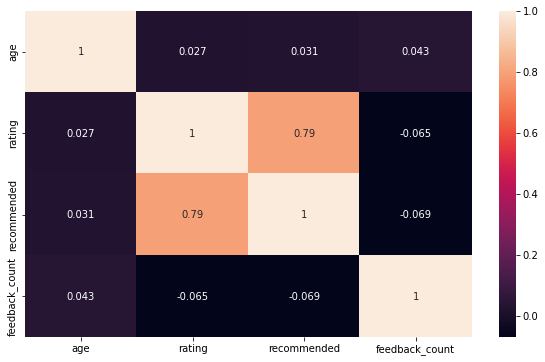

In [26]:
sns.heatmap(df.corr(), annot=True);

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [27]:
df.columns

Index(['age', 'title', 'text', 'rating', 'recommended', 'feedback_count',
       'division', 'department', 'class'],
      dtype='object')

1    19293
0     4172
Name: recommended, dtype: int64


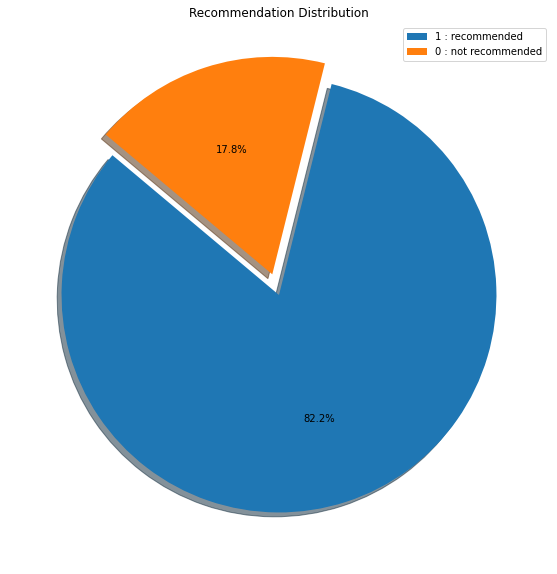

In [28]:
# recommended : 
# Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

print(df.recommended.value_counts())

plt.figure(figsize=(10,10))

explode = [0,0.1]
plt.pie(df.recommended.value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['1 : recommended','0 : not recommended'])
plt.title('Recommendation Distribution')
plt.axis('off');

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [29]:
# we will only use 'text' and 'recommended' columns for ML operations

df_ml = df[['text', 'recommended']].copy()

In [30]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23465 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         22640 non-null  object
 1   recommended  23465 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 550.0+ KB


---
---


### Missing Value Detection

In [31]:
missing_values(df_ml)

,Missing_Number,Missing_Percent
text,825,0.035


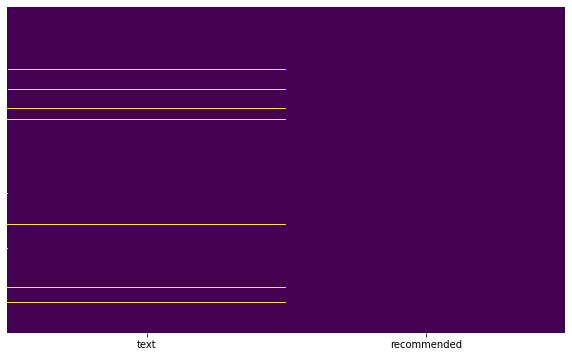

In [32]:
sns.heatmap(df_ml.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [33]:
df_ml.isnull().melt(value_name="missing")

,variable,missing
0,text,False
1,text,False
2,text,False
3,text,False
4,text,False
...,...,...
46925,recommended,False
46926,recommended,False
46927,recommended,False
46928,recommended,False


<Figure size 720x360 with 0 Axes>

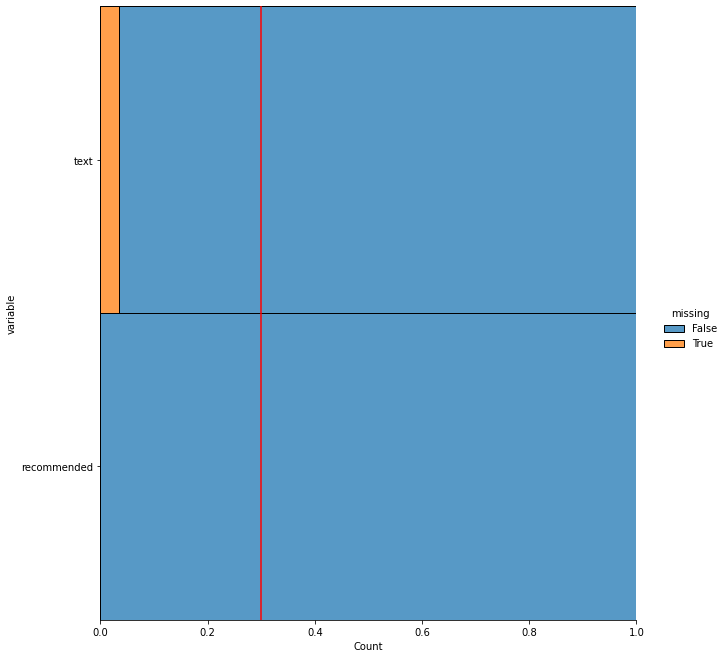

In [34]:
plt.figure(figsize = (10, 5))

sns.displot(
    data = df_ml.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.axvline(0.3, color = "r");

In [37]:
df_ml = df_ml.dropna()

In [38]:
df_ml.isnull().sum()

text           0
recommended    0
dtype: int64

In [39]:
missing_values(df_ml)

,Missing_Number,Missing_Percent


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [40]:
df_ml.head()

,text,recommended
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",1
2,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1


In [42]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [43]:
stop_words = stopwords.words('english')

In [44]:
def cleaning(data):
    
    #1. Tokenize and lower
    text_tokens = word_tokenize(data.lower()) 
    
    #2. Remove punctuations and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Remove Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [45]:
df_ml["text"] = df_ml["text"].apply(cleaning)
df_ml["text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                          love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom ha...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

In [46]:
" ".join(df_ml["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',


In [47]:
rare_words = pd.Series(" ".join(df_ml["text"]).split()).value_counts()
rare_words

dress           11352
fit             10127
size             9362
love             8989
top              8280
                ...  
lusciousness        1
harness             1
anyday              1
sunless             1
platinum            1
Length: 11908, dtype: int64

In [48]:
rare_words = rare_words[rare_words <= 2] 

In [49]:
rare_words.index

Index(['fiddling', 'shortens', 'pause', 'accepted', 'torsoed', 'napkin',
       'dreamed', 'ate', 'preferably', 'freshly',
       ...
       'hourgass', 'admirable', 'slid', 'bizarrely', 'limitation',
       'lusciousness', 'harness', 'anyday', 'sunless', 'platinum'],
      dtype='object', length=6437)

In [50]:
df_ml["text"] = df_ml["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_ml["text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                          love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [53]:
df_ml[df_ml["recommended"] == 0].head(3)

,text,recommended
2,high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...,0
5,love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening skirt would take away embellish...,0
10,dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back,0


In [54]:
df_ml[df_ml["recommended"] == 1].head(3)

,text,recommended
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,1
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,1


### Collect Words (positive and negative separately)

In [55]:
" ".join(df_ml["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 '

In [57]:
positive_words =" ".join(df_ml[df_ml["recommended"] == 1].text).split()
positive_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'petite',
 'decided',
 'though',
 'said',
 'everything',
 'pant',


In [58]:
negative_words = " ".join(df_ml[df_ml["recommended"] == 0].text).split()
negative_words

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',
 'fit',
 'tight',
 'material',

In [60]:
print("Count of Positive Words\t:", len(positive_words))

Count of Positive Words	: 503919


In [61]:
print("Count of Negative Words\t:", len(negative_words))

Count of Negative Words	: 113417


### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [62]:
review_text = df_ml["text"]

In [63]:
all_words = " ".join(review_text)

In [64]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store glad bc never'

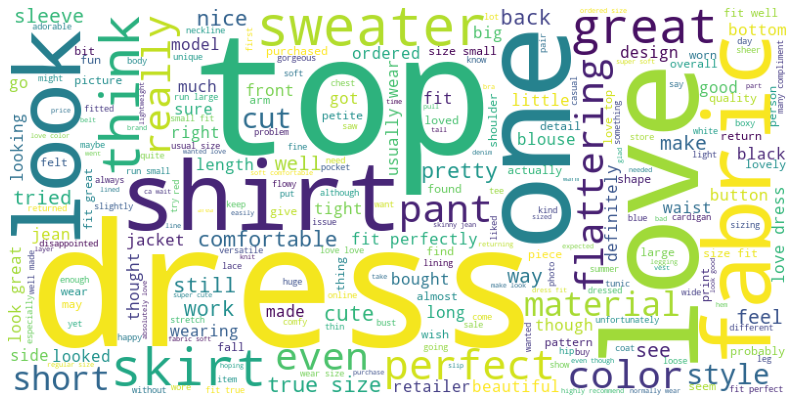

In [66]:
# word cloud for all words
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words=250).generate(all_words)

plt.figure(figsize = (14,14))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

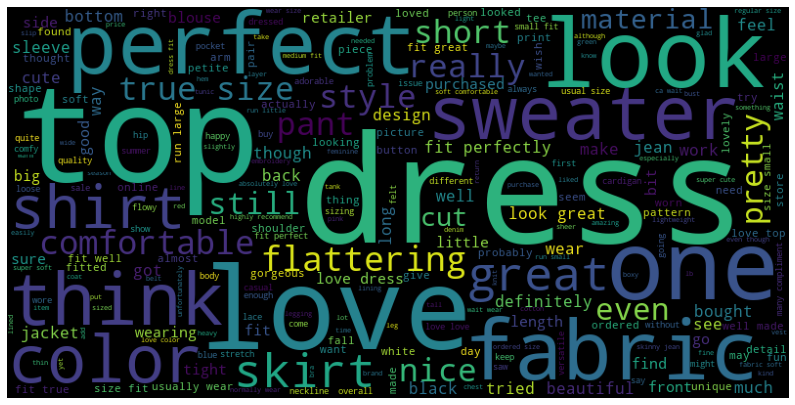

In [68]:
# word cloud for positive words
pos_words = " ".join(positive_words)
wordcloud = WordCloud(width = 800, height = 400, background_color = "black", max_words=250).generate(pos_words)

plt.figure(figsize = (14,14))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

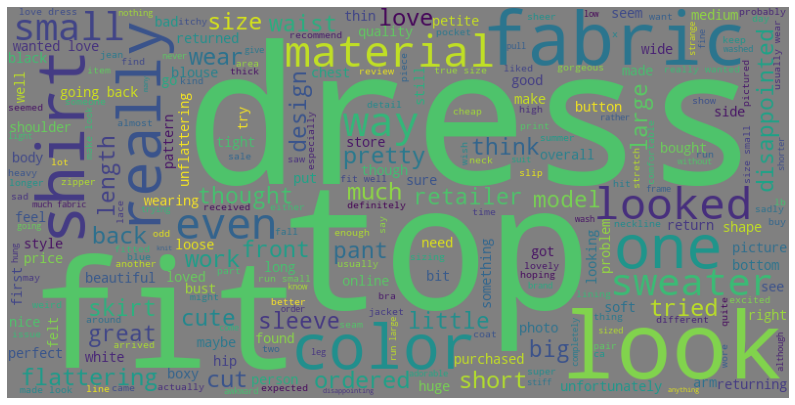

In [69]:
# word cloud for positive words
neg_words = " ".join(negative_words)
wordcloud = WordCloud(width = 800, height = 400, background_color = "gray", max_words=250).generate(neg_words)

plt.figure(figsize = (14,14))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Counting words

In [70]:
counter_all = Counter(word_tokenize(all_words))
counter_all.most_common(50)

[('dress', 11352),
 ('fit', 10127),
 ('size', 9362),
 ('love', 8989),
 ('top', 8280),
 ('like', 7035),
 ('color', 6916),
 ('look', 6889),
 ('wear', 6519),
 ('great', 6100),
 ('would', 5427),
 ('fabric', 4862),
 ('small', 4589),
 ('really', 3924),
 ('ordered', 3834),
 ('little', 3773),
 ('perfect', 3759),
 ('one', 3703),
 ('flattering', 3485),
 ('soft', 3320),
 ('well', 3235),
 ('back', 3186),
 ('comfortable', 3047),
 ('cute', 3030),
 ('nice', 3016),
 ('bought', 2986),
 ('beautiful', 2950),
 ('bit', 2877),
 ('material', 2811),
 ('shirt', 2791),
 ('large', 2791),
 ('much', 2703),
 ('sweater', 2697),
 ('length', 2637),
 ('run', 2629),
 ('jean', 2595),
 ('also', 2583),
 ('work', 2527),
 ('petite', 2429),
 ('got', 2426),
 ('long', 2399),
 ('could', 2383),
 ('short', 2358),
 ('waist', 2306),
 ('quality', 2259),
 ('medium', 2233),
 ('skirt', 2220),
 ('think', 2194),
 ('pretty', 2188),
 ('even', 2166)]

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [71]:
X = df_ml["text"].values
y = df_ml["recommended"].map({0:1, 1:0}).values

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [75]:
X_train_count

<18112x5439 sparse matrix of type '<class 'numpy.int64'>'
	with 447651 stored elements in Compressed Sparse Row format>

In [76]:
len(X_train_count.toarray())

18112

In [77]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [78]:
len(X_test_count.toarray())

4528

In [79]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [80]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,accessory,accident,accidental,accidentally,accommodate,accommodates,accommodating,accomodate,according,accordingly,account,accurate,accurately,achieve,across,acrylic,act,action,active,activewear,activity,actual,actuality,actually,ad,ada,add,added,addicted,adding,addition,additional,additionally,address,adequate,adequately,adjust,adjustable,adjusted,adjusting,adjustment,admire,admired,admiring,admit,admittedly,adn,ador,adorable,adore,adored,adult,advantage,advertised,advice,advise,advised,aesthetic,aesthetically,affair,affect,afford,affordable,afraid,afternoon,afterward,afterwards,ag,age,aged,ago,agree,agreed,...,wonder,wondered,wonderful,wonderfully,wondering,wonky,wont,wood,wooden,woodland,wool,woolite,wooly,word,wore,work,workable,worked,working,workmanship,workout,workplace,world,worn,worried,worry,worrying,worse,worst,worth,worthwhile,worthy,wou,woul,would,wouldnt,wound,woven,wow,wowed,wrap,wrapped,wrapping,wri,wring,wrinkle,wrinkled,wrinkling,wrinkly,wrist,write,writing,written,wrong,wrote,xl,xmas,xsmall,xsp,xspetite,xtra,xx,xxl,xxsmall,xxsp,yarn,yay,yeah,year,yellow,yellowish,yellowy,yep,yes,yesterday,yet,yikes,yo,yoga,yoke,york,young,younger,youre,youthful,yr,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [81]:
X_train

array(['love gorgeous shade unflattering skintone make look version tied dress holding horse come fantastic fit flattering tummy rib cage size generous curve give regular',
       'found store last weekend thought perfect got size small plenty space usually small long found knee length zoom see detail work along front edge complement pretty back pocket btw worn everything summer let hope blend wash ok',
       'negative thing say color person different much coral pink pink fine tad unexpected ordered size fit perfectly chest laser cut out yoke add nice feminine unique touch otherwise basic top ca wait wear',
       ...,
       'wanted love skirt good quality front loose flap exposing return',
       'absolutely love top soft comfortable perfectly flowy definitely favorite go casual summer top',
       'purchased blue version store nice royal blue navy although could worn navy thought fit flattering middle piece pleat le obvious blue purple tie neck untied still low cut'],
      dtype=o

### TF-IDF

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [84]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.29303784],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [85]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,accessory,accident,accidental,accidentally,accommodate,accommodates,accommodating,accomodate,according,accordingly,account,accurate,accurately,achieve,across,acrylic,act,action,active,activewear,activity,actual,actuality,actually,ad,ada,add,added,addicted,adding,addition,additional,additionally,address,adequate,adequately,adjust,adjustable,adjusted,adjusting,adjustment,admire,admired,admiring,admit,admittedly,adn,ador,adorable,adore,adored,adult,advantage,advertised,advice,advise,advised,aesthetic,aesthetically,affair,affect,afford,affordable,afraid,afternoon,afterward,afterwards,ag,age,aged,ago,agree,agreed,...,wonder,wondered,wonderful,wonderfully,wondering,wonky,wont,wood,wooden,woodland,wool,woolite,wooly,word,wore,work,workable,worked,working,workmanship,workout,workplace,world,worn,worried,worry,worrying,worse,worst,worth,worthwhile,worthy,wou,woul,would,wouldnt,wound,woven,wow,wowed,wrap,wrapped,wrapping,wri,wring,wrinkle,wrinkled,wrinkling,wrinkly,wrist,write,writing,written,wrong,wrote,xl,xmas,xsmall,xsp,xspetite,xtra,xx,xxl,xxsmall,xxsp,yarn,yay,yeah,year,yellow,yellowish,yellowy,yep,yes,yesterday,yet,yikes,yo,yoga,yoke,york,young,younger,youre,youthful,yr,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.107,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.132,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.293
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,

ML Models

In [86]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, average_precision_score

In [90]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model, X_test, y_test, cmap="viridis")

## Logistic Regression

### CountVectorizer

In [91]:
from sklearn.linear_model import LogisticRegression

logreg_count = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = 'balanced', random_state = 101)
logreg_count.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LogReg_Count Model
------------------
[[3189  519]
 [ 122  698]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3708
           1       0.57      0.85      0.69       820

    accuracy                           0.86      4528
   macro avg       0.77      0.86      0.80      4528
weighted avg       0.89      0.86      0.87      4528

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.92      0.76      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.90      0.85     18112
weighted avg       0.92      0.89      0.90     18112



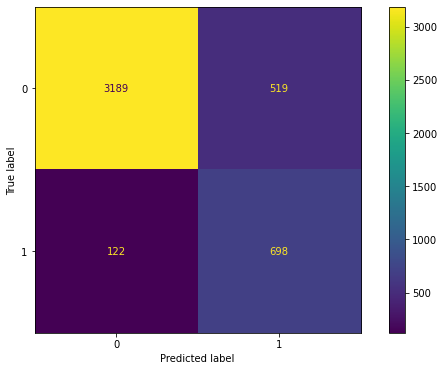

In [92]:
print("LogReg_Count Model")
print ("------------------")
eval(logreg_count, X_train_count, X_test_count)

In [93]:
import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

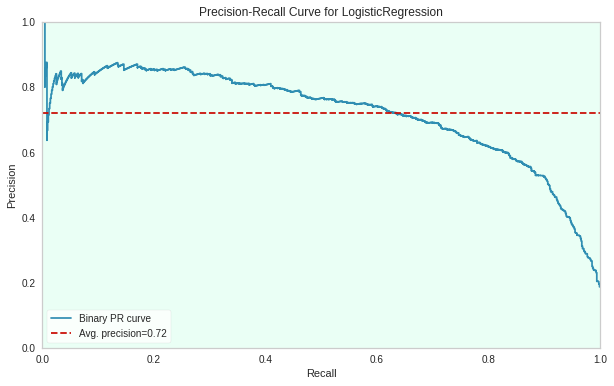

In [94]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      LogisticRegression(C = 0.1, max_iter = 1000, class_weight= "balanced", random_state=101),
      classes = logreg_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [95]:
y_pred = logreg_count.predict(X_test_count)
log_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_AP = viz.score_

In [96]:
print("viz.score_       : ", viz.score_)
print("LogReg_Count_rec : ", log_count_rec)
print("LogReg_Count_f1  : ", log_count_f1)
print("LogReg_Count_AP  : ", log_AP)

viz.score_       :  0.7204496433007829
LogReg_Count_rec :  [0.86003236 0.85121951]
LogReg_Count_f1  :  [0.90867645 0.68532155]
LogReg_Count_AP  :  0.7204496433007829


### TF-IDF

In [97]:
logreg_tfidf = LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state = 101)
logreg_tfidf.fit(X_train_tf_idf,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LogReg_TFIDF Model
------------------
[[3172  536]
 [ 114  706]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3708
           1       0.57      0.86      0.68       820

    accuracy                           0.86      4528
   macro avg       0.77      0.86      0.80      4528
weighted avg       0.89      0.86      0.87      4528

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.64      0.92      0.76      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.84     18112
weighted avg       0.92      0.89      0.90     18112



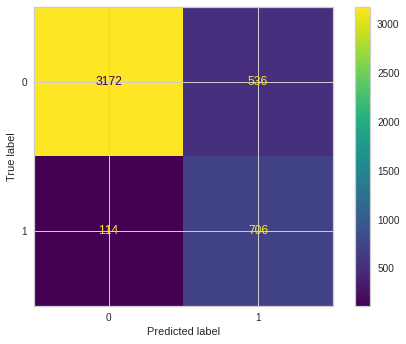

In [98]:
print("LogReg_TFIDF Model")
print("------------------")
eval(logreg_tfidf, X_train_tf_idf, X_test_tf_idf)

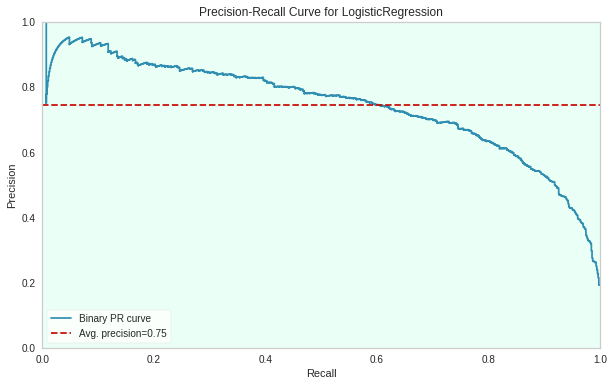

In [99]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state=101),
    classes = logreg_count.classes_,
    per_class = True,
    cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [100]:
y_pred = logreg_tfidf.predict(X_test_tf_idf)
log_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_tf_idf_AP = viz.score_

In [101]:
print("viz.score_       : ", viz.score_)
print("LogReg_TFIDF_rec : ", log_tf_idf_rec)
print("LogReg_TFIDF_f1  : ", log_tf_idf_f1)
print("LogReg_TFIDF_AP  : ", log_tf_idf_AP)

viz.score_       :  0.745938457101501
LogReg_TFIDF_rec :  [0.85544768 0.86097561]
LogReg_TFIDF_f1  :  [0.9070632  0.68477207]
LogReg_TFIDF_AP  :  0.745938457101501


## Naive Bayes 

### Countvectorizer **MultiNomialNB**

In [102]:
from sklearn.naive_bayes import MultinomialNB

In [103]:
nbmulti_count = MultinomialNB()
nbmulti_count.fit(X_train_count,y_train)

MultinomialNB()

NBMulti_Count Model
-------------------
[[3363  345]
 [ 198  622]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3708
           1       0.64      0.76      0.70       820

    accuracy                           0.88      4528
   macro avg       0.79      0.83      0.81      4528
weighted avg       0.89      0.88      0.88      4528

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.70      0.81      0.75      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.85     18112
weighted avg       0.91      0.90      0.91     18112



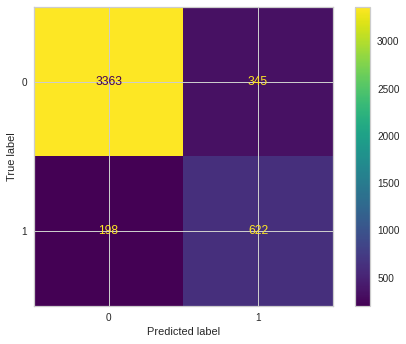

In [104]:
print("NBMulti_Count Model")
print("-------------------")
eval(nbmulti_count, X_train_count, X_test_count)

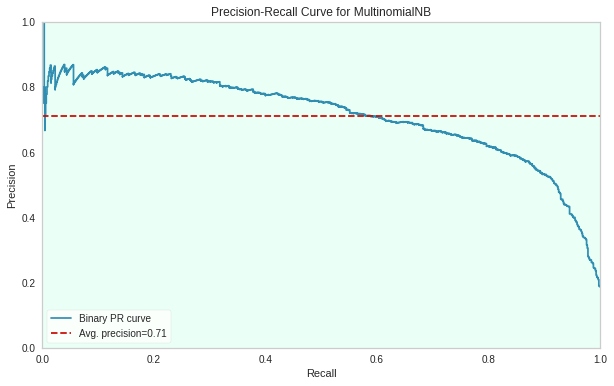

In [105]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      MultinomialNB(),
      classes = nbmulti_count.classes_,  
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [106]:
y_pred = nbmulti_count.predict(X_test_count)
nb_multi_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_count_AP = viz.score_

In [107]:
print("viz.score_         : ", viz.score_)
print("NBMulti_Count_rec : ", nb_multi_count_rec)
print("NBMulti_Count_f1  : ", nb_multi_count_f1)
print("NBMulti_Count_AP  : ", nb_multi_count_AP)

viz.score_         :  0.7117022007299719
NBMulti_Count_rec :  [0.90695793 0.75853659]
NBMulti_Count_f1  :  [0.92529922 0.69613878]
NBMulti_Count_AP  :  0.7117022007299719


### TF-IDF

## Support Vector Machine (SVM)

### Countvectorizer

### TD-IDF

## Random Forest

### Countvectorizer

### TF-IDF

## Ada Boosting

### Countvectorizer

### TF-IDF

## DL modeling

### Tokenization

### Creating word index

### Converting tokens to numeric

### Maximum number of tokens for all documents¶

### Fixing token counts of all documents (pad_sequences)

### Train Set Split

### Modeling

## BERT Modeling

### Tokenization

### Train test split

### Transformation text to tensor

### Batch Size

### Creating Model

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___